# Insights on Los Angeles' 311 data for 2021 service requests

Michael Gonzalez

This notebook will be explorating of Los Angeles' 311 data with the focus on comparing two cities that have high service requests. The main focus for this notebook is to look for any new trends for 2021. I will be looking at the closed status of each requests with the created and serviced dates for the two cities. The data will be loaded into dataframes and pandas with the datetime libraries. The plots will be created from the seaborn and matplotlib libraries.

## Breif Overview  

I will need to import useful libraries to timestamp and profile data to discover insights. This project benefited from looking for insights in the closing rate of the open requests. The data is orgainzed and has many useful columns to experiment with new ideas. The focus of this project is looking for cities that have the highest service requests for 2021. Let's see which cities lead the trend.

In [25]:
# Importing needed libraries.
import pandas as pd
import numpy as np
import pandas_profiling
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data into a Data Frame.
dfb = pd.read_csv('...\my311_data_analysis\MyLA311_Service_Request_Data_2021.csv')

# Displaying the top five rows of data.
dfb.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,MobileOS,Anonymous,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1831742951,01/01/2021 12:06:16 AM,01/02/2021 02:23:21 PM,SR Created,LASAN,Metal/Household Appliances,Closed,Call,NaN,N,...,"(34.2893893478, -118.46359286)",481.0,H,6.0,North Valley APC,7.0,Monica Rodriguez,5.0,Sylmar,MISSION
1,1-1831741721,01/01/2021 12:27:17 AM,01/03/2021 01:44:27 PM,SR Created,LASAN,Metal/Household Appliances,Closed,Call,NaN,N,...,"(34.2140011149, -118.628669123)",529.0,G,3.0,South Valley APC,12.0,John Lee,11.0,West Hills,TOPANGA
2,1-1831744521,01/01/2021 12:39:25 AM,01/01/2021 02:17:19 PM,SR Created,LASAN,Bulky Items,Cancelled,Mobile App,iOS,N,...,"(34.0350731257, -118.389916081)",632.0,H,6.0,South Los Angeles APC,5.0,Paul Koretz,61.0,South Robertson,WEST LOS ANGELES
3,1-1831743461,01/01/2021 12:40:36 AM,01/02/2021 10:49:40 PM,SR Created,LASAN,Bulky Items,Closed,Call,NaN,N,...,"(34.2007135317, -118.630509454)",529.0,G,5.0,South Valley APC,12.0,John Lee,11.0,West Hills,TOPANGA
4,1-1831744681,01/01/2021 12:44:16 AM,01/08/2021 03:21:27 AM,SR Created,LASAN,Bulky Items,Closed,Mobile App,iOS,Y,...,"(34.0723309679, -118.311496089)",633.0,H,1.0,Central APC,4.0,Nithya Raman,119.0,Greater Wilshire,OLYMPIC


## Exploratory Data Analysis 

In this section, I will include the bar chart that represented the count of the highest service requests for the city of Los Angeles. Then I will looking for insights based on the service closed dates and any other trends. Creating new variables that represents the CreatedDate, ClosedDate, and ServiceDate columns for a description of the data.

Text(0, 0.5, 'Count of service requests')

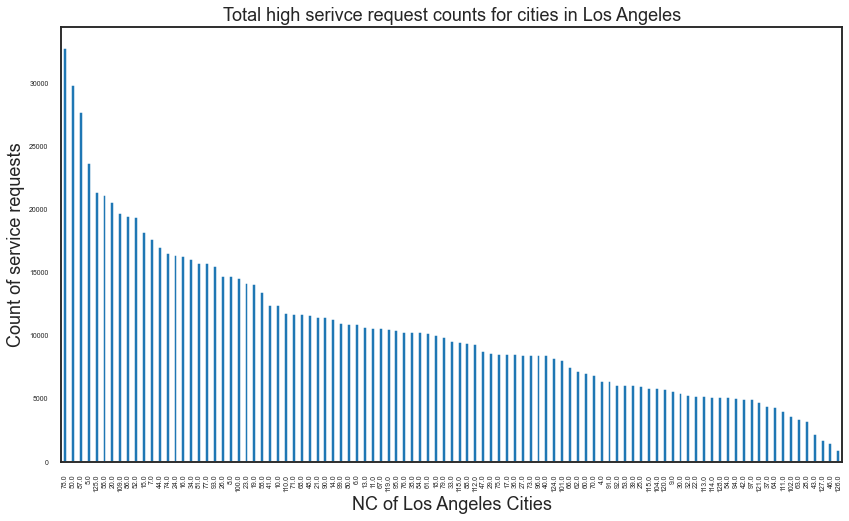

In [26]:
# Plotting a bar chart that will display the cities with the highest service request.
ax = dfb['NC'].value_counts().plot(kind = 'bar',
                                    figsize = (14, 8),
                                    fontsize = 7,
                                    title = "Total high serivce request counts for cities in Los Angeles")
ax.set_xlabel("NC of Los Angeles Cities")
ax.set_ylabel("Count of service requests")

## Exploratory Finding 

In thisexploratory data analysis, I found that in 2021 Boyle Heights and South Los Angeles are the same areas with the highest
service request counts. The insight here is that South Los Angeles has become the area with the most service requests. This has changed from 2020, where Boyle Heights had the most requests.  

## Data Visualiztion Preparation

In [27]:
# Creating a new variable that represents the listed columns with timestamp information.
dfb['CreatedDate'] = pd.to_datetime(dfb['CreatedDate'], errors = 'coerce')
dfb['ClosedDate'] = pd.to_datetime(dfb['ClosedDate'], errors = 'coerce')
dfb['ServiceDate'] = pd.to_datetime(dfb['ServiceDate'], errors = 'coerce')
dfb['closed_created'] = dfb.ClosedDate - dfb.CreatedDate
dfb['service_created'] = dfb.ServiceDate - dfb.CreatedDate

# Creating a new column that has a closed status for NC 78 (South Los Angeles).
dfb['closed_createdD'] = dfb.closed_created / pd.Timedelta(days = 1)
dfbSLA = dfb[(dfb.closed_createdD > (1.0 / 24.0)) & (dfb.Status == 'Closed') & (dfb.NC == 78)][['closed_createdD', 'RequestType']]


# Creating a new column that has a closed status for NC 50 (Boyle Heights).
dfb['closed_createdD'] = dfb.closed_created / pd.Timedelta(days = 1)
dfbBH = dfb[(dfb.closed_createdD > (1.0 / 24.0)) & (dfb.Status == 'Closed') & (dfb.NC == 50)][['closed_createdD', 'RequestType']]


In [28]:
# Comparing the averages of request types with the new column closed_createdD for NC 78 (South Los Angles).
dfbSLAavg = dfbSLA.groupby(['RequestType']).agg(['mean', 'std']).reset_index().sort_values(by = ['RequestType'])
dfbSLAavg

RequestType closed_createdD           
                                          mean        std
0                  Bulky Items        3.254082   8.116458
1          Dead Animal Removal        0.481428   0.340061
2             Electronic Waste        2.131363   2.036153
3                     Feedback        1.502824        NaN
4             Graffiti Removal        4.328708   8.998643
5          Homeless Encampment       19.653874  33.308168
6       Illegal Dumping Pickup        7.870776  16.116712
7   Metal/Household Appliances        2.295595   2.084209
8   Multiple Streetlight Issue       41.893625  43.049155
9                        Other        2.100992   1.668824
10    Single Streetlight Issue       48.014600  41.297415

In [29]:
# Compairing the request type, closed_createdD with the color values for NC 78 (South Los Angeles).
dfbSLAavg['colorvals'] = sns.color_palette('colorblind', 11)
dfbSLAavg

RequestType closed_createdD             \
                                          mean        std   
0                  Bulky Items        3.254082   8.116458   
1          Dead Animal Removal        0.481428   0.340061   
2             Electronic Waste        2.131363   2.036153   
3                     Feedback        1.502824        NaN   
4             Graffiti Removal        4.328708   8.998643   
5          Homeless Encampment       19.653874  33.308168   
6       Illegal Dumping Pickup        7.870776  16.116712   
7   Metal/Household Appliances        2.295595   2.084209   
8   Multiple Streetlight Issue       41.893625  43.049155   
9                        Other        2.100992   1.668824   
10    Single Streetlight Issue       48.014600  41.297415   

                                            colorvals  
                                                       
0   (0.00392156862745098, 0.45098039215686275, 0.6...  
1   (0.8705882352941177, 0.5607843137254902, 0.019...  
2   (0.00784313725490196, 0.6196078431372549, 0.45...  
3       (0.8352941176470589, 0.3686274509803922, 0.0)  
4      (0.8, 0.47058823529411764, 0.7372549019607844)  
5   (0.792156862745098, 0.5686274509803921, 0.3803...  
6   (0.984313725490196, 0.6862745098039216, 0.8941...  
7   (0.5803921568627451, 0.5803921568627451, 0.580...  
8       (0.9254901960784314, 0.8823529411764706, 0.2)  
9   (0.33725490196078434, 0.7058823529411765, 0.91...  
10  (0.00392156862745098, 0.45098039215686275, 0.6...

In [30]:
# Comparing the averages of request types with the new column closed_createdD for NC 50 (Boyle Heights).
dfbBHavg = dfbBH.groupby(['RequestType']).agg(['mean', 'std']).reset_index().sort_values(by = ['RequestType'])
dfbBHavg

RequestType closed_createdD           
                                         mean        std
0                 Bulky Items        3.428105   4.960434
1         Dead Animal Removal        0.894263   2.506709
2            Electronic Waste        3.111884   2.151661
3            Graffiti Removal        2.287641   4.009017
4         Homeless Encampment       25.589215  37.546892
5      Illegal Dumping Pickup        5.797665  11.687602
6  Metal/Household Appliances        3.230710   2.202482
7  Multiple Streetlight Issue       23.259471  27.390792
8                       Other        2.182361   1.575150
9    Single Streetlight Issue       23.283872  27.676247

In [31]:
# Compairing the request type, closed_createdD with the color values for NC 50 (Boyle Heights).
dfbBHavg['colorvals'] = sns.color_palette('colorblind', 10)
dfbBHavg

RequestType closed_createdD             \
                                         mean        std   
0                 Bulky Items        3.428105   4.960434   
1         Dead Animal Removal        0.894263   2.506709   
2            Electronic Waste        3.111884   2.151661   
3            Graffiti Removal        2.287641   4.009017   
4         Homeless Encampment       25.589215  37.546892   
5      Illegal Dumping Pickup        5.797665  11.687602   
6  Metal/Household Appliances        3.230710   2.202482   
7  Multiple Streetlight Issue       23.259471  27.390792   
8                       Other        2.182361   1.575150   
9    Single Streetlight Issue       23.283872  27.676247   

                                           colorvals  
                                                      
0  (0.00392156862745098, 0.45098039215686275, 0.6...  
1  (0.8705882352941177, 0.5607843137254902, 0.019...  
2  (0.00784313725490196, 0.6196078431372549, 0.45...  
3      (0.8352941176470589, 0.3686274509803922, 0.0)  
4     (0.8, 0.47058823529411764, 0.7372549019607844)  
5  (0.792156862745098, 0.5686274509803921, 0.3803...  
6  (0.984313725490196, 0.6862745098039216, 0.8941...  
7  (0.5803921568627451, 0.5803921568627451, 0.580...  
8      (0.9254901960784314, 0.8823529411764706, 0.2)  
9  (0.33725490196078434, 0.7058823529411765, 0.91...

## Data Visualizations 

In this next section of the notebook. I will talk about the visualization of my results. This will include a comparison of different request types for the cities of South Los Angeles and Boyle Heights. The visualizations will display the completion rate of requests related to the service request types.

[Text(0.5, 0, 'Days to Completion'),
 Text(0.5, 1.0, 'The most completed requests in South Los Angeles'),
 Text(0, 0.5, '')]

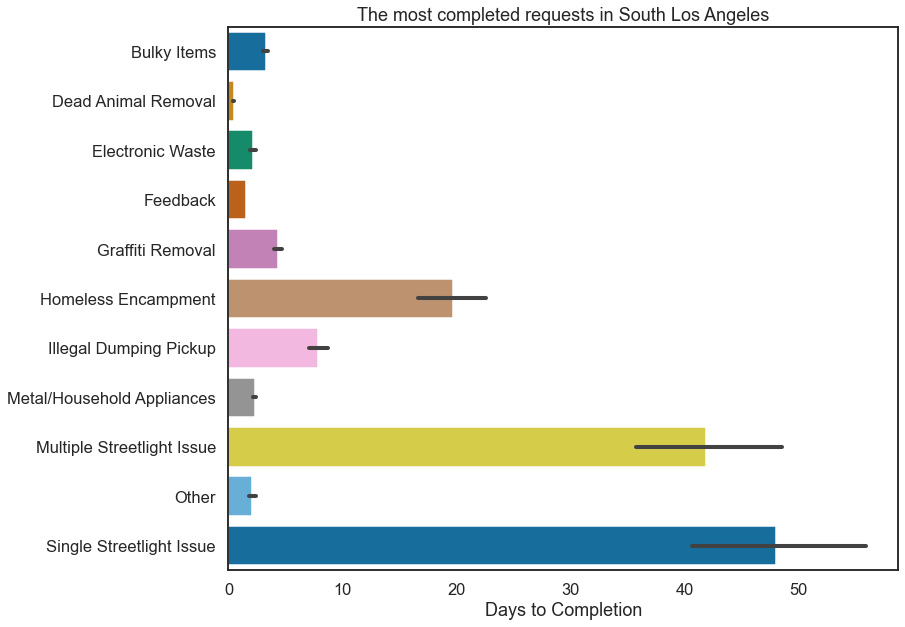

In [32]:
# Plotting a stacked bar chart of camparing the completion time with other requests for NC 78 (South Los Angeles).
plt.figure(figsize = (12, 10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.barplot(y = 'RequestType', x = 'closed_createdD', data = dfbSLA, order = dfbSLAavg.RequestType, palette = list(dfbSLAavg.colorvals))
sla_plot = ax.set(xlabel = 'Days to Completion', title = 'The most completed requests in South Los Angeles', ylabel = '')
sla_plot

[Text(0.5, 0, 'Days to Completion'),
 Text(0.5, 1.0, 'The most completed requests in Boyle Heights'),
 Text(0, 0.5, '')]

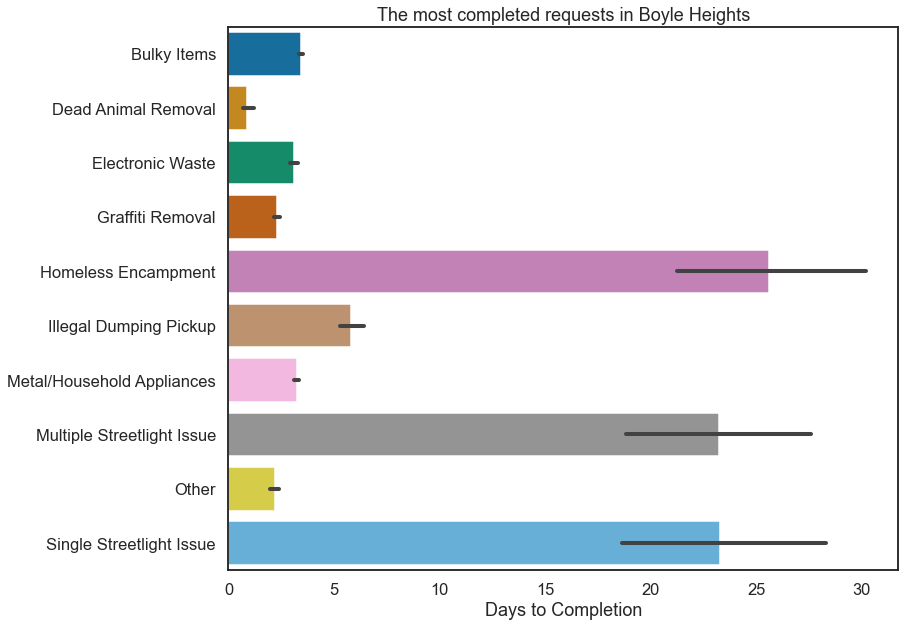

In [33]:
# Plotting a stacked bar chart of camparing the completion time with other requests for NC 50 (Boyle Heights).
plt.figure(figsize = (12, 10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.barplot(y = 'RequestType', x = 'closed_createdD', data = dfbBH, order = dfbBHavg.RequestType, palette = list(dfbBHavg.colorvals))
bh_plot = ax.set(xlabel = 'Days to Completion', title = 'The most completed requests in Boyle Heights', ylabel = '')
bh_plot

## Conclusion 

The comparison of the 2021 data has both cities have the similar request type issues. In South Los Angeles, the signle streetlight issue service request type took the longest to complete. This ongoing issue has a simple solution to correct it and someone to have a faster completion rate. Switching to Boyle Heights, the homeless encampment service request type took the longest to complete with over 30 days to close the request type. It has gotten to be a bigger problem with a slow completion rate.